# Titanic: Machine learning from disaster- Random Forest

## I - Exploratory data analysis

* Data extraction : we'll load the dataset and have a first look at it.
* Cleaning : we'll fill in missing values.
* Plotting : we'll create some interesting charts that'll (hopefully) spot correlations and hidden insights out of the data.
* Assumptions : we'll formulate hypotheses from the charts.

1.Import Useful libraries


In [1]:

# import libraries we will use
import warnings
warnings.filterwarnings('ignore')

# matplotlib for plotting
from matplotlib import pyplot as plt
import matplotlib
# matplotlib.style.use('ggplot')
%matplotlib inline

# seaborn for plotting
#import seaborn as sns

# pandas for dataframes
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# numpy for linear algebra
import numpy as np

# sklearn for machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Two datasets are available: a training set and a test set.

2.Loading the training set.


In [2]:
# load training set into a pandas dataframe
data = pd.read_csv('./train.csv')

In [3]:
test_data = pd.read_csv('./test.csv')

3.Show head of the dataframe

In [4]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


The Survived column is the target variable. If Suvival = 1 the passenger survived, otherwise he's dead.
The other variables that describe the passengers are:

* PassengerId: and id given to each traveler on the boat
* Pclass: the passenger class. It has three possible values: 1,2,3
* The Name
* The Sex
* The Age
* SibSp: number of siblings and spouses traveling with the passenger
* Parch: number of parents and children traveling with the passenger
* The ticket number
* The ticket Fare
* The cabin number
* The embarkation. It has three possible values S,C,Q>

4.Pandas provide Dataframe Information





In [6]:
# dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


5.Describe numerical features using the describe method.

In [7]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
342/891.0

0.3838383838383838

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
# statistical view of the numeric columns
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


6.Let's now make some charts.

Lets Visaualize some attribute distribution and Survival based on different attributes





In [11]:
print(data.groupby('Survived').count())

          PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Survived                                                                    
0                 549     549   549  549  424    549    549     549   549   
1                 342     342   342  342  290    342    342     342   342   

          Cabin  Embarked  
Survived                   
0            68       549  
1           136       340  


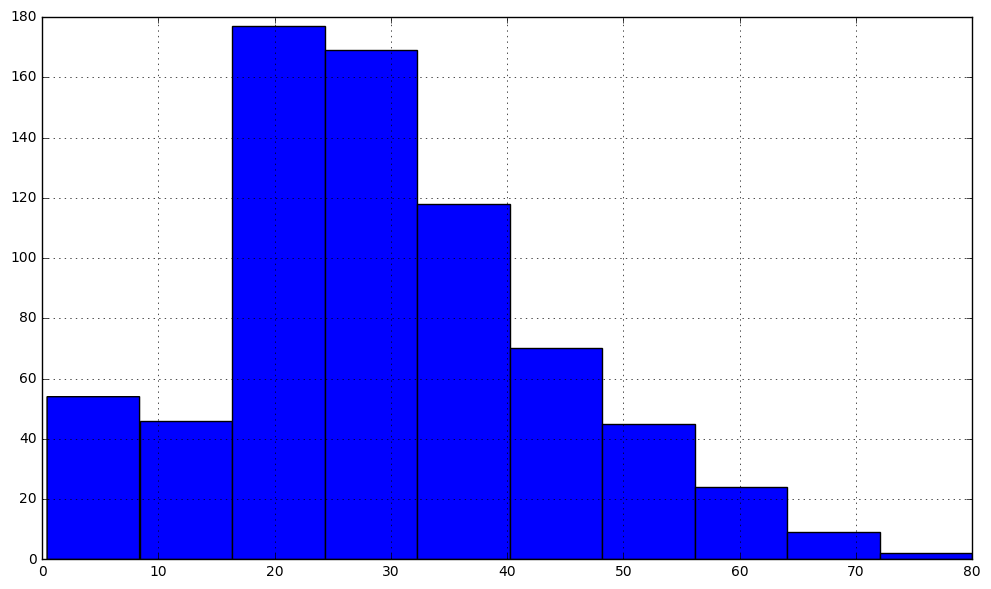

In [12]:
figure = plt.figure(figsize=(12,7))
data.Age.hist()

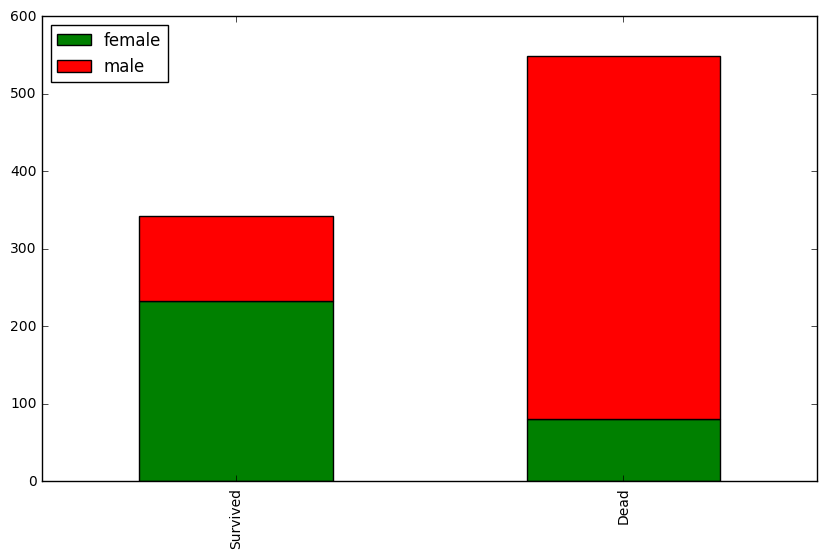

In [13]:
# correlate the survival with the Sex variable.
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,6),color = ['g','r'])

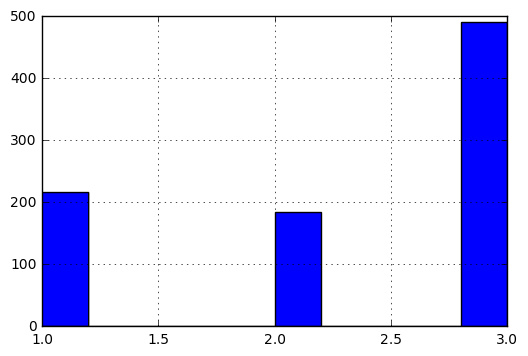

In [14]:
data.Pclass.hist()

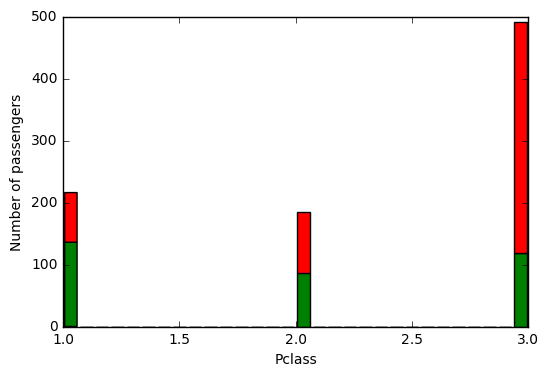

In [15]:
#correlate the survival with the Pclass variable. 
plt.hist([data[data['Survived']==1]['Pclass'],data[data['Survived']==0]['Pclass']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Pclass')
plt.ylabel('Number of passengers')

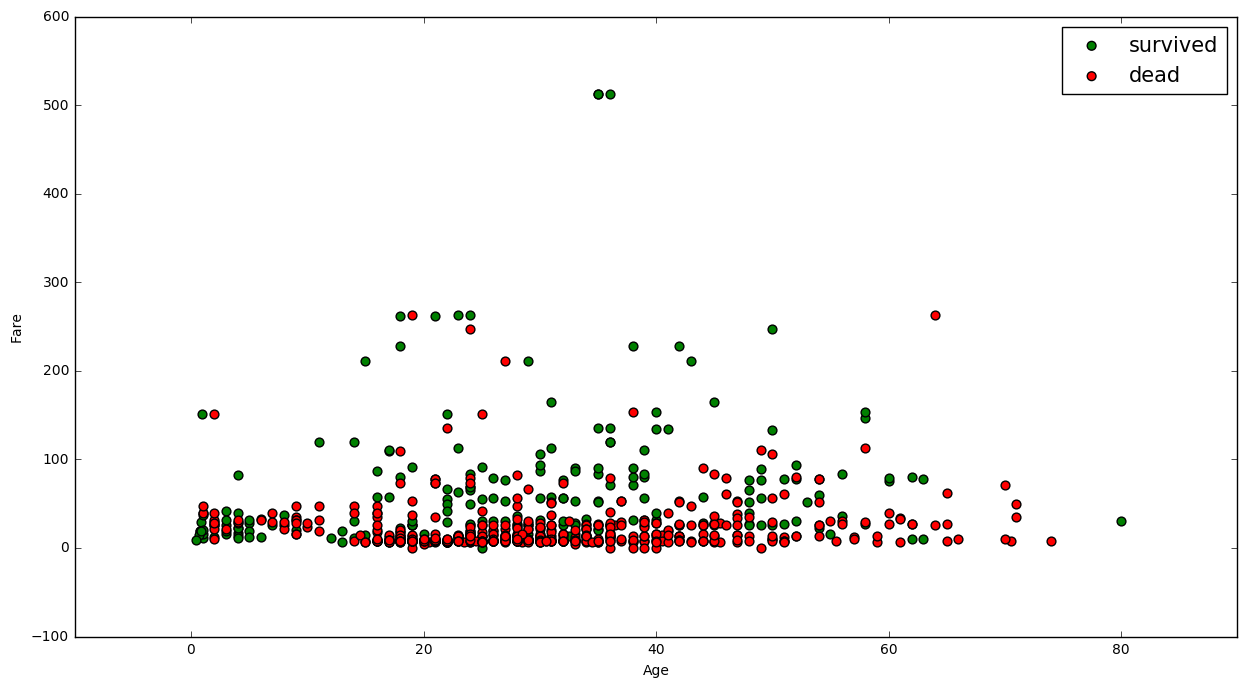

In [16]:
# combine the age, the fare and the survival on a single chart
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

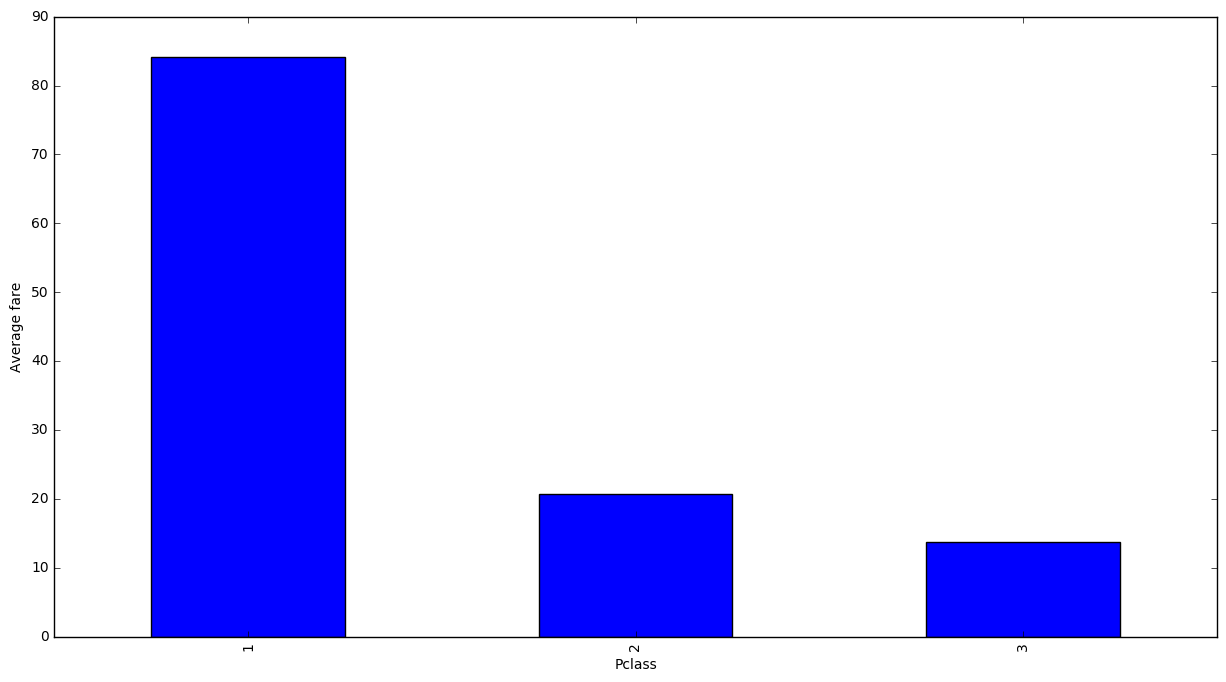

In [17]:
# ticket fare correlates with Pclass
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(15,8), ax = ax)

## II - Feature engineering

 we append test to train and affect the result to combined

In [18]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('./train.csv')
    
    # reading test data
    test = pd.read_csv('./test.csv')

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop('Survived',1,inplace=True)
    

    # merging train data and test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True,axis=1)
    
    return combined

In [19]:
combined = get_combined_data()

In [20]:
combined.shape


(1309, 11)

In [21]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Processing Age

In [22]:
# find unique values from age attribute
combined.Age.unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,    nan,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,  28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,
        18.  ,   3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,
        11.  ,  45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,
        33.  ,  23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,
        14.5 ,  70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,
        40.5 ,  44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,
        20.5 ,  62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,
        60.  ,  10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,
        80.  ,  70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,
        74.  ,  22.5 ,  18.5 ,  67.  ,  76.  ,  26.5 ,  60.5 ,  11.5 ,
         0.33,   0.17,  38.5 ])

In [23]:
# Filling the missing values with median of Age column
combined['Age'] = combined.Age.fillna(data.Age.mean())

In [24]:
# Checking is there any more missing value present
combined.Age.unique()

array([ 22.        ,  38.        ,  26.        ,  35.        ,
        29.69911765,  54.        ,   2.        ,  27.        ,
        14.        ,   4.        ,  58.        ,  20.        ,
        39.        ,  55.        ,  31.        ,  34.        ,
        15.        ,  28.        ,   8.        ,  19.        ,
        40.        ,  66.        ,  42.        ,  21.        ,
        18.        ,   3.        ,   7.        ,  49.        ,
        29.        ,  65.        ,  28.5       ,   5.        ,
        11.        ,  45.        ,  17.        ,  32.        ,
        16.        ,  25.        ,   0.83      ,  30.        ,
        33.        ,  23.        ,  24.        ,  46.        ,
        59.        ,  71.        ,  37.        ,  47.        ,
        14.5       ,  70.5       ,  32.5       ,  12.        ,
         9.        ,  36.5       ,  51.        ,  55.5       ,
        40.5       ,  44.        ,   1.        ,  61.        ,
        56.        ,  50.        ,  36.        ,  45.5 

### Processing Sex

In [25]:
#function maps the string values male and female to 0 and 1 respectively.
combined.Sex =combined.Sex.map({'male':0, 'female':1}).astype(int)

In [26]:
#checking the data description
combined.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,0.355997,29.844567,0.498854,0.385027,33.295479
std,378.020061,0.837836,0.478997,12.883400,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,0.000000,22.000000,0.000000,0.000000,NaN
50%,655.000000,3.000000,0.000000,29.699118,0.000000,0.000000,NaN
75%,982.000000,3.000000,1.000000,35.000000,1.000000,0.000000,NaN
max,1309.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [27]:
combined.Sex.unique()

array([0, 1])

### Processing Fare

In [28]:
combined.Fare.unique()

array([   7.25  ,   71.2833,    7.925 ,   53.1   ,    8.05  ,    8.4583,
         51.8625,   21.075 ,   11.1333,   30.0708,   16.7   ,   26.55  ,
         31.275 ,    7.8542,   16.    ,   29.125 ,   13.    ,   18.    ,
          7.225 ,   26.    ,    8.0292,   35.5   ,   31.3875,  263.    ,
          7.8792,    7.8958,   27.7208,  146.5208,    7.75  ,   10.5   ,
         82.1708,   52.    ,    7.2292,   11.2417,    9.475 ,   21.    ,
         41.5792,   15.5   ,   21.6792,   17.8   ,   39.6875,    7.8   ,
         76.7292,   61.9792,   27.75  ,   46.9   ,   80.    ,   83.475 ,
         27.9   ,   15.2458,    8.1583,    8.6625,   73.5   ,   14.4542,
         56.4958,    7.65  ,   29.    ,   12.475 ,    9.    ,    9.5   ,
          7.7875,   47.1   ,   15.85  ,   34.375 ,   61.175 ,   20.575 ,
         34.6542,   63.3583,   23.    ,   77.2875,    8.6542,    7.775 ,
         24.15  ,    9.825 ,   14.4583,  247.5208,    7.1417,   22.3583,
          6.975 ,    7.05  ,   14.5   ,   15.0458, 

In [29]:
combined['Fare'] = combined.Fare.fillna(data.Fare.median())

In [65]:
combined[combined.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [66]:
combined[combined.Fare==0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,3,"Leonard, Mr. Lionel",0,36.000000,0,0,LINE,0.0,NaN,2
263,264,1,"Harrison, Mr. William",0,40.000000,0,0,112059,0.0,B94,2
271,272,3,"Tornquist, Mr. William Henry",0,25.000000,0,0,LINE,0.0,NaN,2
277,278,2,"Parkes, Mr. Francis ""Frank""",0,29.699118,0,0,239853,0.0,NaN,2
302,303,3,"Johnson, Mr. William Cahoone Jr",0,19.000000,0,0,LINE,0.0,NaN,2
413,414,2,"Cunningham, Mr. Alfred Fleming",0,29.699118,0,0,239853,0.0,NaN,2
466,467,2,"Campbell, Mr. William",0,29.699118,0,0,239853,0.0,NaN,2
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",0,29.699118,0,0,239854,0.0,NaN,2
597,598,3,"Johnson, Mr. Alfred",0,49.000000,0,0,LINE,0.0,NaN,2
633,634,1,"Parr, Mr. William Henry Marsh",0,29.699118,0,0,112052,0.0,NaN,2


In [68]:
combined['Fare'==0] = combined.Fare.fillna(data.Fare.median())

### Processing Pclass

In [69]:
combined.Pclass.unique()

array([3, 1, 2])

### Processing SibSp, Parch

In [70]:
combined.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [71]:
combined.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6, 9])

### Processing Embarked

In [72]:
combined.Embarked.unique()

array([2, 0, 1])

In [73]:
#function replaces the two missing values of Embarked with the most frequent Embarked value.
print(combined.groupby('Embarked').count());

          PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Embarked                                                                    
0                 270     270   270  270  270    270    270     270   270   
1                 123     123   123  123  123    123    123     123   123   
2                 916     916   916  916  916    916    916     916   916   

          Cabin  False  
Embarked                
0           118    270  
1             5    123  
2           172    916  


In [74]:
combined.Embarked=combined.Embarked.fillna('S')

In [75]:
combined.Embarked.unique()

array([2, 0, 1])

In [76]:
#function maps the string values S,C and Q to 2 ,0 and 1 respectively.
Ports = list(enumerate(np.unique(combined['Embarked'])))    # determine all values of Embarked,
Ports_dict = { name : i for i, name in Ports }              # set up a dictionary in the form  Ports : index
combined.Embarked = combined.Embarked.map( lambda x: Ports_dict[x]).astype(int)     # Convert all Embark strings to int


In [77]:
combined.Embarked.unique()

array([2, 0, 1])

### Evaluation Matrics

In [78]:
model_data=combined.ix[0:890]
model_data['Survived']=pd.read_csv('./train.csv').Survived

In [79]:
train, test = train_test_split(model_data, test_size = 0.2)
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,False,Survived
287,288,3,"Naidenoff, Mr. Penko",0,22.000000,0,0,349206,7.8958,NaN,2,7.8958,0
466,467,2,"Campbell, Mr. William",0,29.699118,0,0,239853,0.0000,NaN,2,0.0000,0
626,627,2,"Kirkland, Rev. Charles Leonard",0,57.000000,0,0,219533,12.3500,NaN,1,12.3500,0
11,12,1,"Bonnell, Miss. Elizabeth",1,58.000000,0,0,113783,26.5500,C103,2,26.5500,1
885,886,3,"Rice, Mrs. William (Margaret Norton)",1,39.000000,0,5,382652,29.1250,NaN,1,29.1250,0


In [80]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,False,Survived
404,405,3,"Oreskovic, Miss. Marija",1,20.000000,0,0,315096,8.6625,NaN,2,8.6625,0
64,65,1,"Stewart, Mr. Albert A",0,29.699118,0,0,PC 17605,27.7208,NaN,0,27.7208,0
865,866,2,"Bystrom, Mrs. (Karolina)",1,42.000000,0,0,236852,13.0000,NaN,2,13.0000,1
140,141,3,"Boulos, Mrs. Joseph (Sultana)",1,29.699118,0,2,2678,15.2458,NaN,0,15.2458,0
538,539,3,"Risien, Mr. Samuel Beard",0,29.699118,0,0,364498,14.5000,NaN,2,14.5000,0


In [81]:
targets=test.Survived

In [82]:
test.drop('Survived',1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,False
404,405,3,"Oreskovic, Miss. Marija",1,20.000000,0,0,315096,8.6625,NaN,2,8.6625
64,65,1,"Stewart, Mr. Albert A",0,29.699118,0,0,PC 17605,27.7208,NaN,0,27.7208
865,866,2,"Bystrom, Mrs. (Karolina)",1,42.000000,0,0,236852,13.0000,NaN,2,13.0000
140,141,3,"Boulos, Mrs. Joseph (Sultana)",1,29.699118,0,2,2678,15.2458,NaN,0,15.2458
538,539,3,"Risien, Mr. Samuel Beard",0,29.699118,0,0,364498,14.5000,NaN,2,14.5000
260,261,3,"Smith, Mr. Thomas",0,29.699118,0,0,384461,7.7500,NaN,1,7.7500
857,858,1,"Daly, Mr. Peter Denis",0,51.000000,0,0,113055,26.5500,E17,2,26.5500
620,621,3,"Yasbeck, Mr. Antoni",0,27.000000,1,0,2659,14.4542,NaN,0,14.4542
714,715,2,"Greenberg, Mr. Samuel",0,52.000000,0,0,250647,13.0000,NaN,2,13.0000
342,343,2,"Collander, Mr. Erik Gustaf",0,28.000000,0,0,248740,13.0000,NaN,2,13.0000


In [83]:
train_features=train[['Sex', 'Age','Pclass','Fare','SibSp','Parch','Embarked']] 
train_out=train['Survived']

In [84]:
clf = RandomForestClassifier()

In [85]:
clf=clf.fit(train_features, train_out)

In [86]:
test_features=test[['Sex', 'Age','Pclass','Fare','SibSp','Parch','Embarked']]

In [87]:
Out = clf.predict(test_features)

In [88]:
result_metric = pd.DataFrame(columns=['PassengerId', 'Survived'])
result_metric['PassengerId'] = test.PassengerId
result_metric['Survived'] = Out.astype(int)
result_metric.to_csv('randomForest.csv', index=False)
print(result_metric.head(10))

     PassengerId  Survived
404          405         0
64            65         0
865          866         1
140          141         1
538          539         0
260          261         0
857          858         1
620          621         0
714          715         0
342          343         0


In [89]:
print (classification_report(targets, result_metric.Survived))

             precision    recall  f1-score   support

          0       0.83      0.84      0.83       105
          1       0.77      0.76      0.76        74

avg / total       0.80      0.80      0.80       179



In [90]:
print(accuracy_score(targets, result_metric.Survived))

0.804469273743


## III - Modeling

We'll be using Random Forests. Random Froests has proven a great efficiency

1.Use the train set to build a predictive model.    

2.Evaluate the model using the train set.

3.Test the model using the test set and generate and output file for the submission.

In [91]:
targets = pd.read_csv('./train.csv').Survived
data = combined.ix[0:890]
test_data = combined.ix[891:]
    
   

In [92]:
df_out = targets
df_features = data[['Sex', 'Age','Pclass','Fare','SibSp','Parch','Embarked']]
df_features
# df_features


,Sex,Age,Pclass,Fare,SibSp,Parch,Embarked
0,0,22.000000,3,7.2500,1,0,2
1,1,38.000000,1,71.2833,1,0,0
2,1,26.000000,3,7.9250,0,0,2
3,1,35.000000,1,53.1000,1,0,2
4,0,35.000000,3,8.0500,0,0,2
5,0,29.699118,3,8.4583,0,0,1
6,0,54.000000,1,51.8625,0,0,2
7,0,2.000000,3,21.0750,3,1,2
8,1,27.000000,3,11.1333,0,2,2
9,1,14.000000,2,30.0708,1,0,0


In [93]:
clf = RandomForestClassifier()

In [94]:
df_out.shape

(891,)

In [95]:
df_features.shape

(891, 7)

In [96]:
clf=clf.fit(df_features, df_out)
score = clf.score(df_features, df_out)
score
# clf


0.96520763187429859

In [97]:
for header, value in zip(df_features.columns,clf.feature_importances_):
    print (header," : ", value)


Sex  :  0.276577020108
Age  :  0.247006555858
Pclass  :  0.102956933764
Fare  :  0.262284064699
SibSp  :  0.0472934757965
Parch  :  0.0312318698037
Embarked  :  0.0326500799696


In [98]:
test_features=test_data[['Sex', 'Age','Pclass','Fare','SibSp','Parch','Embarked']]

In [99]:
Output = clf.predict(test_features)


In [100]:
for header, value in zip(test_features.columns,clf.feature_importances_):
    print (header," : ", value)

Sex  :  0.276577020108
Age  :  0.247006555858
Pclass  :  0.102956933764
Fare  :  0.262284064699
SibSp  :  0.0472934757965
Parch  :  0.0312318698037
Embarked  :  0.0326500799696


In [101]:
result = pd.DataFrame(columns=['PassengerId', 'Survived'])
result['PassengerId'] = test_data.PassengerId
result['Survived'] = Output.astype(int)
result.to_csv('randomForest.csv', index=False)
# print(result)
test_data['Survived']=result['Survived']

In [102]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,False,Survived
891,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,1,7.8292,0
892,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,2,7.0000,0
893,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,1,9.6875,0
894,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,2,8.6625,0
895,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,2,12.2875,0
896,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,2,9.2250,0
897,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,1,7.6292,0
898,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,2,29.0000,0
899,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,0,7.2292,1
900,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,2,24.1500,0
